In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore')

In [ ]:
# Let's look at the dataset
df = pd.read_csv('/content/drive/MyDrive/data/amazon_delivery.csv')
# Show the dataset
df.head()

Order_ID  Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  \
0  ialx566343618         37           4.9       22.745049        75.892471   
1  akqg208421122         34           4.5       12.913041        77.683237   
2  njpu434582536         23           4.4       12.914264        77.678400   
3  rjto796129700         38           4.7       11.003669        76.976494   
4  zguw716275638         32           4.6       12.972793        80.249982   

   Drop_Latitude  Drop_Longitude Order_Date Order_Time Pickup_Time  \
0      22.765049       75.912471   19-03-22   11:30:00    11:45:00   
1      13.043041       77.813237   25-03-22   19:45:00    19:50:00   
2      12.924264       77.688400   19-03-22    8:30:00     8:45:00   
3      11.053669       77.026494   05-04-22   18:00:00    18:10:00   
4      13.012793       80.289982   26-03-22   13:30:00    13:45:00   

      Weather  Traffic   Vehicle            Area  Delivery_Time     Category  
0       Sunny    High        Air          Urban             120     Clothing  
1      Stormy     Jam   scooter   Metropolitian             165  Electronics  
2  Sandstorms     Low        Air          Urban             130       Sports  
3       Sunny  Medium        Air  Metropolitian             105    Cosmetics  
4      Cloudy    High   scooter   Metropolitian             150         Toys

In [ ]:
df.shape

(43739, 16)

In [ ]:
df.describe(include='all')

Order_ID     Agent_Age  Agent_Rating  Store_Latitude  \
count           43739  43739.000000  43685.000000    43739.000000   
unique          43739           NaN           NaN             NaN   
top     ialx566343618           NaN           NaN             NaN   
freq                1           NaN           NaN             NaN   
mean              NaN     29.567137      4.633780       17.210960   
std               NaN      5.815155      0.334716        7.764225   
min               NaN     15.000000      1.000000      -30.902872   
25%               NaN     25.000000      4.500000       12.933298   
50%               NaN     30.000000      4.700000       18.551440   
75%               NaN     35.000000      4.900000       22.732225   
max               NaN     50.000000      6.000000       30.914057   

        Store_Longitude  Drop_Latitude  Drop_Longitude Order_Date Order_Time  \
count      43739.000000   43739.000000    43739.000000      43739      43739   
unique              NaN            NaN             NaN         44        177   
top                 NaN            NaN             NaN   15-03-22   21:55:00   
freq                NaN            NaN             NaN       1141        460   
mean          70.661177      17.459031       70.821842        NaN        NaN   
std           21.475005       7.342950       21.153148        NaN        NaN   
min          -88.366217       0.010000        0.010000        NaN        NaN   
25%           73.170283      12.985996       73.280000        NaN        NaN   
50%           75.898497      18.633626       76.002574        NaN        NaN   
75%           78.045359      22.785049       78.104095        NaN        NaN   
max           88.433452      31.054057       88.563452        NaN        NaN   

       Pickup_Time Weather Traffic Vehicle            Area  Delivery_Time  \
count        43739   43648   43739   43739           43739   43739.000000   
unique         193       6       5       4               4            NaN   
top       21:30:00     Fog    Low      Air  Metropolitian             NaN   
freq           481    7440   14999   25527           32698            NaN   
mean           NaN     NaN     NaN     NaN             NaN     124.905645   
std            NaN     NaN     NaN     NaN             NaN      51.915451   
min            NaN     NaN     NaN     NaN             NaN      10.000000   
25%            NaN     NaN     NaN     NaN             NaN      90.000000   
50%            NaN     NaN     NaN     NaN             NaN     125.000000   
75%            NaN     NaN     NaN     NaN             NaN     160.000000   
max            NaN     NaN     NaN     NaN             NaN     270.000000   

           Category  
count         43739  
unique           16  
top     Electronics  
freq           2849  
mean            NaN  
std             NaN  
min             NaN  
25%             NaN  
50%             NaN  
75%             NaN  
max             NaN

# **Exploratory Data Analysis**
**Overview of the Data**

Let's start by examining the basic information about the dataset, such as the number of rows and columns, data types, and summary statistics.

In [ ]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [ ]:
df.columns.tolist()

['Order_ID',
 'Agent_Age',
 'Agent_Rating',
 'Store_Latitude',
 'Store_Longitude',
 'Drop_Latitude',
 'Drop_Longitude',
 'Order_Date',
 'Order_Time',
 'Pickup_Time',
 'Weather',
 'Traffic',
 'Vehicle',
 'Area',
 'Delivery_Time',
 'Category']

In [ ]:
df["Category"].value_counts()

Category
Electronics     2849
Books           2824
Jewelry         2802
Toys            2781
Skincare        2772
Watches         2770
Outdoors        2747
Apparel         2726
Sports          2719
Grocery         2691
Pet Supplies    2690
Home            2685
Cosmetics       2677
Kitchen         2673
Clothing        2667
Shoes           2666
Name: count, dtype: int64

**Correlation Analysis**

In [ ]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_cols.corr()

# Display correlation matrix
correlation_matrix

Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  \
Agent_Age         1.000000     -0.067939       -0.004532        -0.009347   
Agent_Rating     -0.067939      1.000000       -0.007792        -0.014203   
Store_Latitude   -0.004532     -0.007792        1.000000         0.655086   
Store_Longitude  -0.009347     -0.014203        0.655086         1.000000   
Drop_Latitude     0.002489     -0.010318        0.926618         0.679743   
Drop_Longitude   -0.000495     -0.013552        0.643916         0.983280   
Delivery_Time     0.254618     -0.289984        0.017009         0.011173   

                 Drop_Latitude  Drop_Longitude  Delivery_Time  
Agent_Age             0.002489       -0.000495       0.254618  
Agent_Rating         -0.010318       -0.013552      -0.289984  
Store_Latitude        0.926618        0.643916       0.017009  
Store_Longitude       0.679743        0.983280       0.011173  
Drop_Latitude         1.000000        0.690943       0.016928  
Drop_Longitude        0.690943        1.000000       0.011523  
Delivery_Time         0.016928        0.011523       1.000000

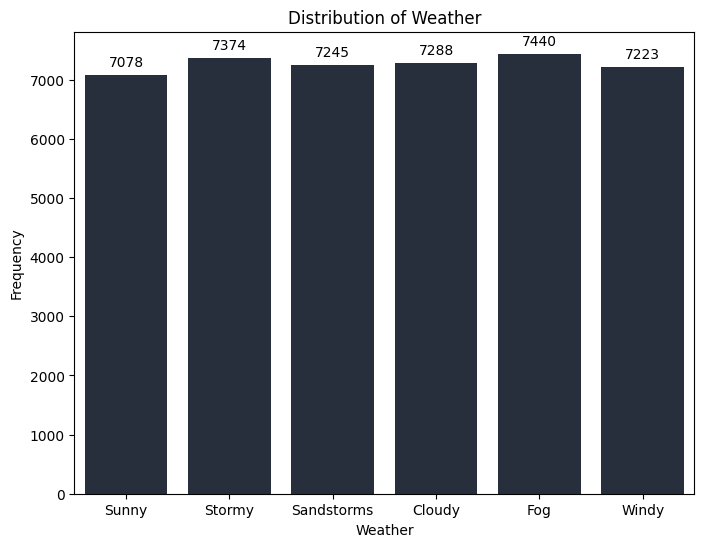

In [ ]:
# Count plot for the 'Weather'
plt.figure(figsize=(8, 6))
ax= sns.countplot(x='Weather', data=df, color='#232f3e')
# Add counts above the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize=10, color='black')
plt.title('Distribution of Weather')
plt.xlabel('Weather')
plt.ylabel('Frequency')
plt.show()

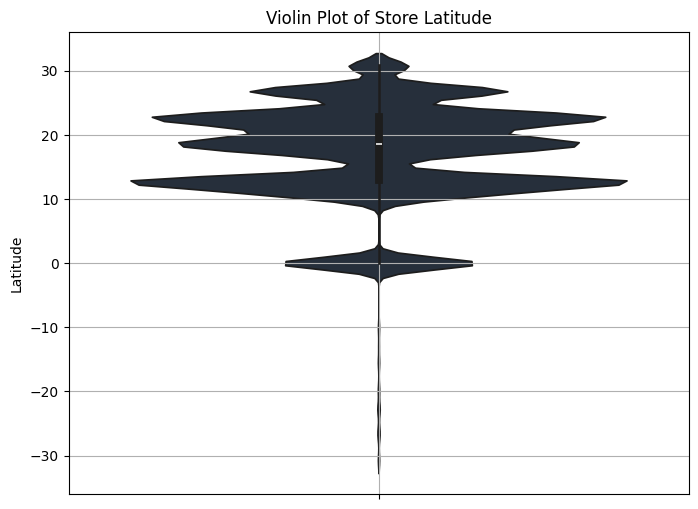

In [ ]:
# Violin plot for 'Store_Latitude'
plt.figure(figsize=(8, 6))
sns.violinplot(y=df['Store_Latitude'], color='#232f3e')
plt.title('Violin Plot of Store Latitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

**Symmetrical Shape**

The plot appears symmetrical, with bulges at specific points. This indicates where data points are more concentrated.

**Latitude Range**

The vertical axis is labeled “Latitude” and ranges from -30 to 30. This represents the latitude values for the stores.

**Density and Spread**

The violin plot shows the probability density of the data at different latitudes. The wider parts of the violin indicate higher density, while the narrower parts represent lower density.

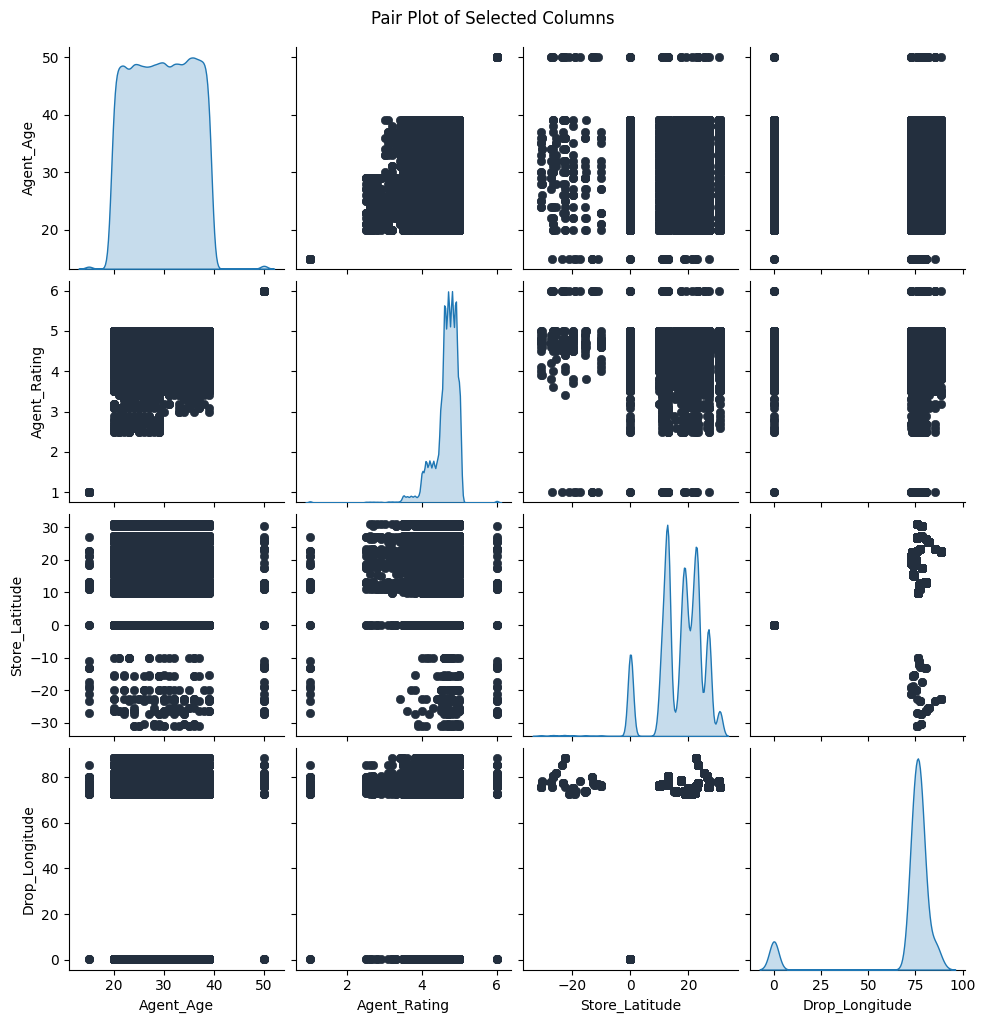

In [ ]:
# Pair plot for selected columns
color = '#232f3e'
pair_plot = sns.pairplot(df[['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Drop_Longitude']], diag_kind='kde')
for ax in pair_plot.axes.flatten():
    if ax:
        for artist in ax.lines + ax.collections:
            artist.set_color(color)
        for artist in ax.patches:
            artist.set_edgecolor(color)
            artist.set_facecolor(color)
    if hasattr(ax, 'collections'):
        for artist in ax.collections:
            artist.set_edgecolor(color)

plt.suptitle('Pair Plot of Selected Columns', y=1.02)
plt.show()

**Agent Rating vs. Agent Age**

There seems to be a positive correlation between agent rating and age. As agent age increases, their rating tends to be higher. The scatter plot shows a diagonal line, suggesting a linear relationship.

**Agent Rating vs. Store Latitude**

No clear trend is visible in the scatter plot. The density of points varies across different latitude values. The histograms for agent rating and store latitude show their individual distributions.

**Agent Rating vs. Drop Longitude**

Similar to the latitude, there is no strong correlation between agent rating and drop longitude. The histograms provide insights into the distribution of these variables.

**Store Latitude vs. Agent Age**

The scatter plot shows a symmetric distribution, with higher density around specific latitude values. The histograms reveal the distribution of both latitude and age.

In [ ]:
cats = ["Weather", "Traffic", "Vehicle", "Area", "Category"]

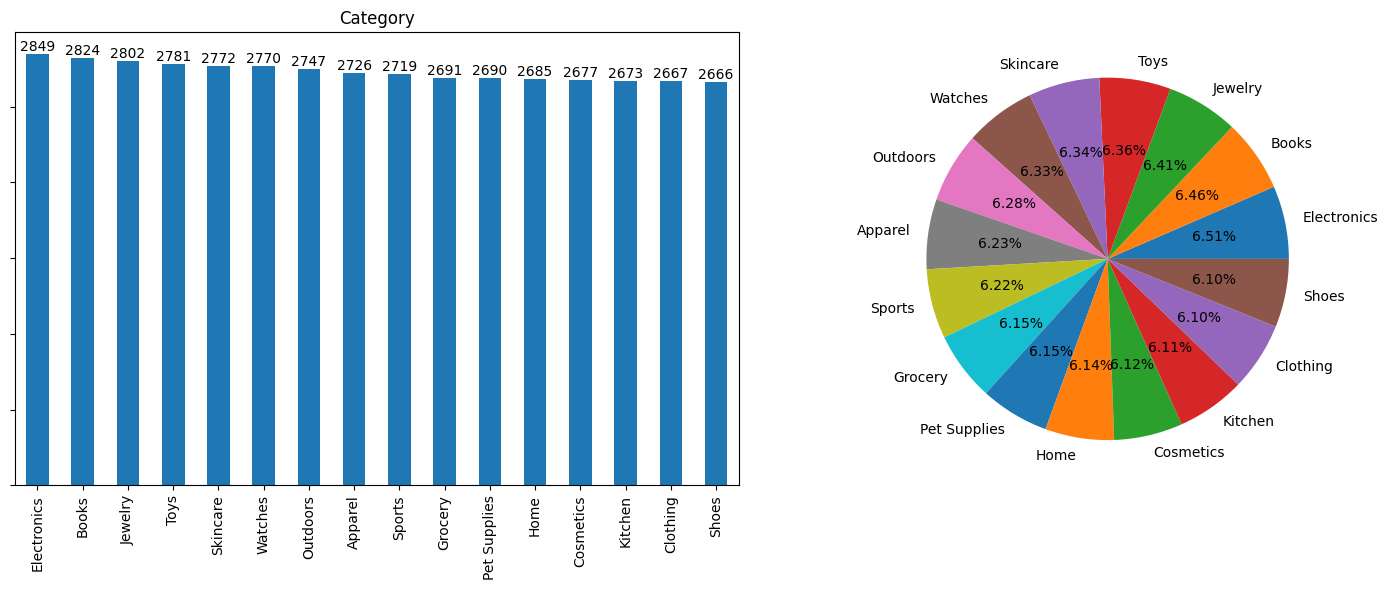

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

index = 0

count = df[cats[-1]].value_counts()

count.plot(kind="bar", ax=axes[index])

for container in axes[index].containers:
    axes[index].bar_label(container)
axes[index].set_yticklabels(())
axes[index].set_ylabel("")
axes[index].set_xlabel("")
axes[index].set_title(cats[-1])

index += 1


count.plot(kind="pie", ax=axes[index], autopct="%0.2f%%")
axes[index].set_ylabel("")
axes[index].set_xlabel("")

plt.tight_layout()
plt.show()

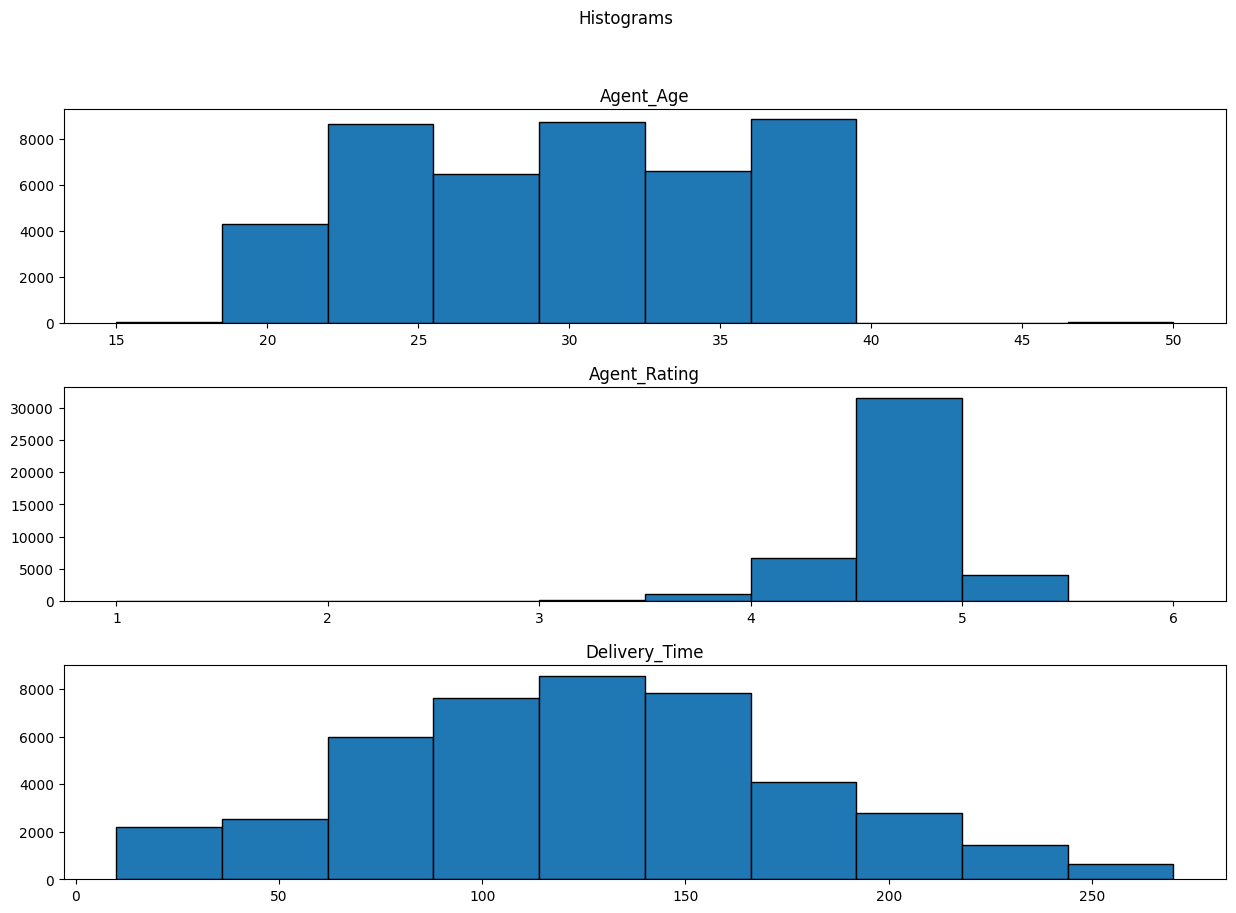

In [ ]:
df.hist(column=['Agent_Age','Agent_Rating','Delivery_Time'],figsize=(15,10),layout=(3,1),grid=False,edgecolor='black')
plt.suptitle('Histograms')
plt.show()

In [ ]:
df['Vehicle'].value_counts()

Vehicle
Air         25527
scooter     14639
van          3558
bicycle        15
Name: count, dtype: int64

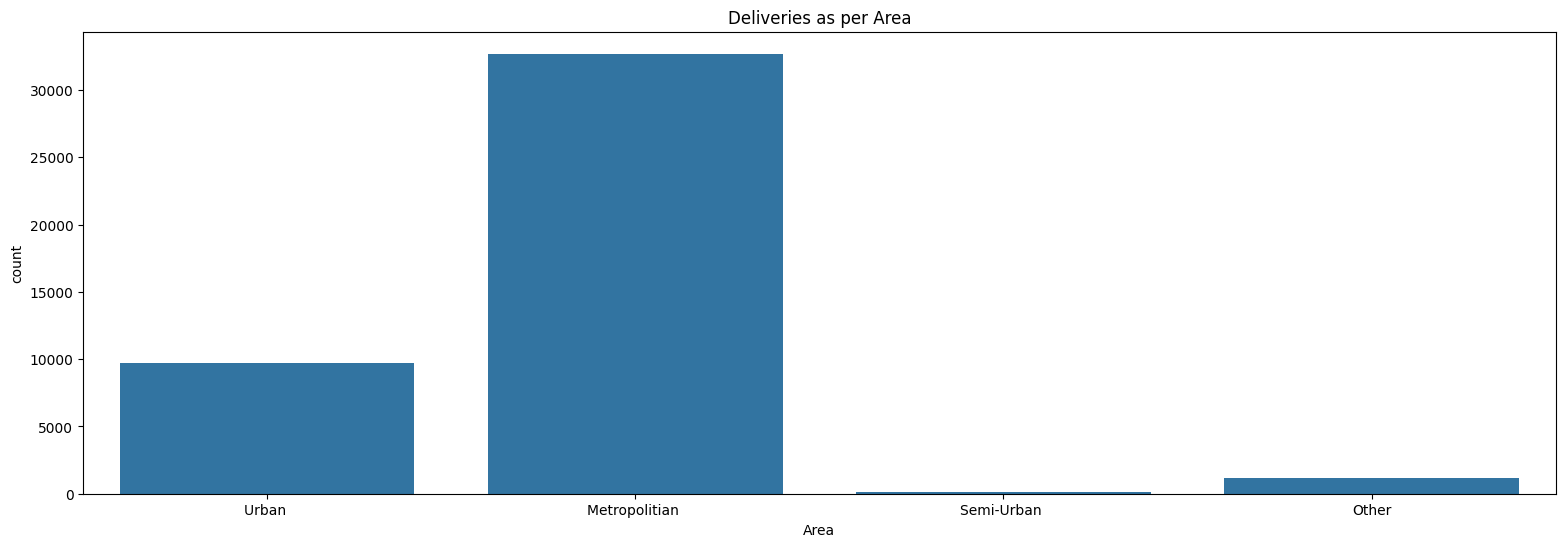

In [ ]:
plt.figure(figsize=(19,6))
sns.countplot(x='Area',data=df)
plt.title('Deliveries as per Area')
plt.show()

# **Data Preparation**

**Handling Missing Values**

Missing data points are addressed through imputation or removal based on their impact on analysis outcomes and data integrity.

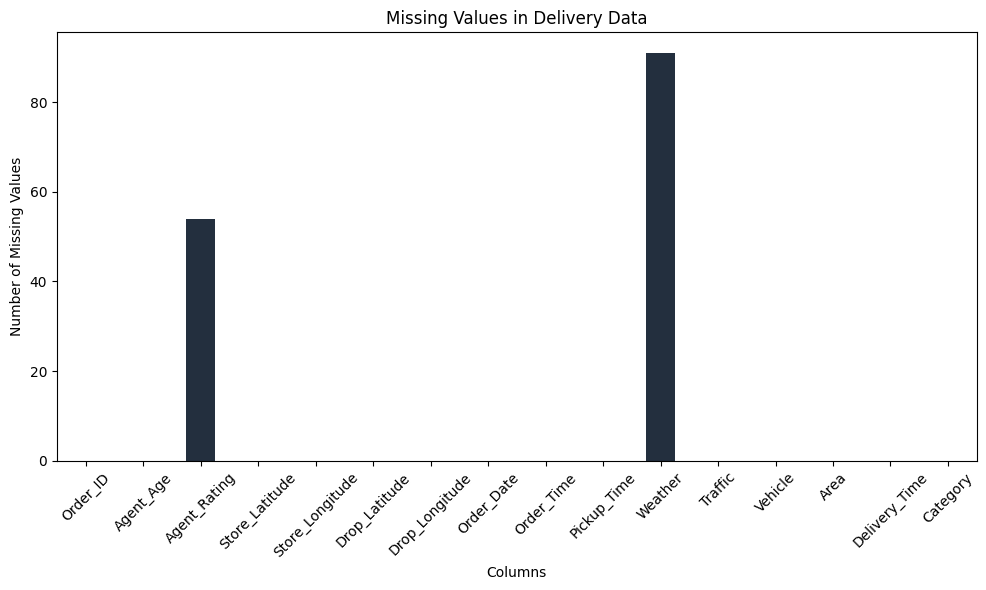

In [ ]:
# Handling missing values
df.isna().sum()

# Plotting
plt.figure(figsize=(10, 6))
df.isna().sum().plot(kind='bar', color="#232f3e")
plt.title('Missing Values in Delivery Data')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Imputation with Mean/Median**

Replace missing values with the mean or median of the column. This is useful for numerical columns like Agent_Rating.

In [ ]:
# Handling missing values with Mean/Median
mean_agent_rating = df['Agent_Rating'].mean()
df['Agent_Rating'] = df['Agent_Rating'].fillna(mean_agent_rating)

**Imputation with Mode**

Replace missing values with the mode (most frequent value) of the column. This is suitable for categorical or ordinal data like Weather.

In [ ]:
# Handling missing values with mode
mode_weather = df['Weather'].mode()[0]
df['Weather'].fillna(mode_weather, inplace=True)

In [ ]:
# Show dataset after handling missing values
df.head()

Order_ID  Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  \
0  ialx566343618         37           4.9       22.745049        75.892471   
1  akqg208421122         34           4.5       12.913041        77.683237   
2  njpu434582536         23           4.4       12.914264        77.678400   
3  rjto796129700         38           4.7       11.003669        76.976494   
4  zguw716275638         32           4.6       12.972793        80.249982   

   Drop_Latitude  Drop_Longitude Order_Date Order_Time Pickup_Time  \
0      22.765049       75.912471   19-03-22   11:30:00    11:45:00   
1      13.043041       77.813237   25-03-22   19:45:00    19:50:00   
2      12.924264       77.688400   19-03-22    8:30:00     8:45:00   
3      11.053669       77.026494   05-04-22   18:00:00    18:10:00   
4      13.012793       80.289982   26-03-22   13:30:00    13:45:00   

      Weather  Traffic   Vehicle            Area  Delivery_Time     Category  
0       Sunny    High        Air          Urban             120     Clothing  
1      Stormy     Jam   scooter   Metropolitian             165  Electronics  
2  Sandstorms     Low        Air          Urban             130       Sports  
3       Sunny  Medium        Air  Metropolitian             105    Cosmetics  
4      Cloudy    High   scooter   Metropolitian             150         Toys

In [ ]:
# Check dataframe NULL values
df.isna().sum()

Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
dtype: int64

**Removing Duplicates**

Remove duplicate rows from the dataset to maintain data integrity and accuracy.

In [ ]:
# Removing Duplicates
df.duplicated().sum()

0

# **Feature Engineering**

**lower cased**

ensure all feature names and documentation are in lowercase for consistency.

In [ ]:
# Convert all column names to lowercase
df.columns = df.columns.str.lower()

# List of all categorical columns in the dataframe
categorical_columns = df.select_dtypes(include=['object']).columns

# Convert all values to lowercase in categorical columns
for col in categorical_columns:
    df[col] = df[col].str.lower()

# Check the first few rows
print(df.head())

        order_id  agent_age  agent_rating  store_latitude  store_longitude  \
0  ialx566343618         37           4.9       22.745049        75.892471   
1  akqg208421122         34           4.5       12.913041        77.683237   
2  njpu434582536         23           4.4       12.914264        77.678400   
3  rjto796129700         38           4.7       11.003669        76.976494   
4  zguw716275638         32           4.6       12.972793        80.249982   

   drop_latitude  drop_longitude order_date order_time pickup_time  \
0      22.765049       75.912471   19-03-22   11:30:00    11:45:00   
1      13.043041       77.813237   25-03-22   19:45:00    19:50:00   
2      12.924264       77.688400   19-03-22    8:30:00     8:45:00   
3      11.053669       77.026494   05-04-22   18:00:00    18:10:00   
4      13.012793       80.289982   26-03-22   13:30:00    13:45:00   

      weather  traffic   vehicle            area  delivery_time     category  
0       sunny    high        ai

**Date and Time Features**

1.   Extracted year, month, day, and weekday from Order_Date.
2.   Derived Order_Hour and Pickup_Hour from Order_Time and Pickup_Time.

In [ ]:
# extracting year, month, day  and weekday from `Order_Date`
df['order_date'] = pd.to_datetime(df['order_date'])
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['day'] = df['order_date'].dt.day
df['weekday'] = df['order_date'].dt.weekday

# extracting order_hour and pickup_hour from `Order_Time` and `Pickup_Time`
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S', errors='coerce')
df['pickup_time'] = pd.to_datetime(df['pickup_time'], format='%H:%M:%S', errors='coerce')
df['order_hour'] = df['order_time'].dt.hour
df['pickup_hour'] = df['pickup_time'].dt.hour

# drop old columns
df.drop(['order_date', 'order_time', 'pickup_time'], axis=1, inplace=True)

# check the first few rows
df.head()

order_id  agent_age  agent_rating  store_latitude  store_longitude  \
0  ialx566343618         37           4.9       22.745049        75.892471   
1  akqg208421122         34           4.5       12.913041        77.683237   
2  njpu434582536         23           4.4       12.914264        77.678400   
3  rjto796129700         38           4.7       11.003669        76.976494   
4  zguw716275638         32           4.6       12.972793        80.249982   

   drop_latitude  drop_longitude     weather  traffic   vehicle  \
0      22.765049       75.912471       sunny    high        air   
1      13.043041       77.813237      stormy     jam   scooter    
2      12.924264       77.688400  sandstorms     low        air   
3      11.053669       77.026494       sunny  medium        air   
4      13.012793       80.289982      cloudy    high   scooter    

             area  delivery_time     category  year  month  day  weekday  \
0          urban             120     clothing  2022      3   19        5   
1  metropolitian             165  electronics  2022      3   25        4   
2          urban             130       sports  2022      3   19        5   
3  metropolitian             105    cosmetics  2022      5    4        2   
4  metropolitian             150         toys  2022      3   26        5   

   order_hour  pickup_hour  
0        11.0           11  
1        19.0           19  
2         8.0            8  
3        18.0           18  
4        13.0           13

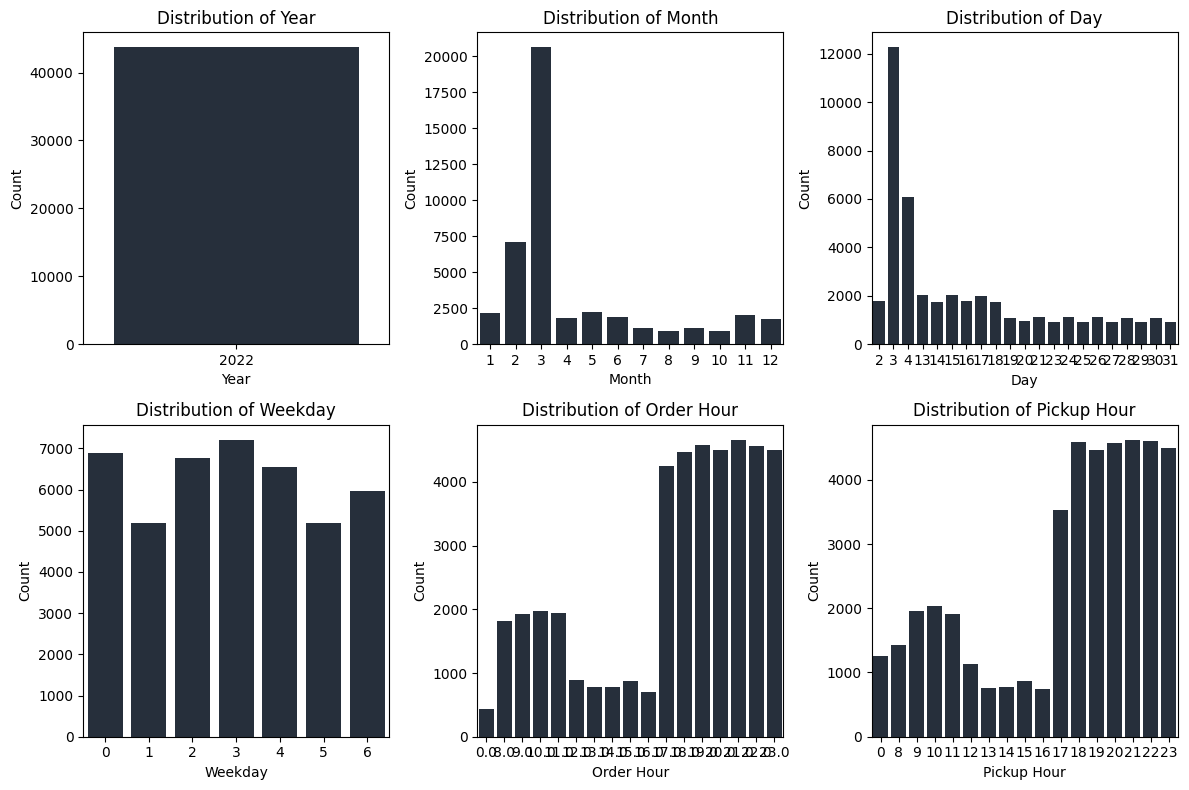

In [ ]:
# Set the custom color
color = '#232f3e'

# Plotting
plt.figure(figsize=(12, 8))

# Distribution of 'year'
plt.subplot(2, 3, 1)
sns.countplot(x='year', data=df, color=color)
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Distribution of 'month'
plt.subplot(2, 3, 2)
sns.countplot(x='month', data=df, color=color)
plt.title('Distribution of Month')
plt.xlabel('Month')
plt.ylabel('Count')

# Distribution of 'day'
plt.subplot(2, 3, 3)
sns.countplot(x='day', data=df, color=color)
plt.title('Distribution of Day')
plt.xlabel('Day')
plt.ylabel('Count')

# Distribution of 'weekday'
plt.subplot(2, 3, 4)
sns.countplot(x='weekday', data=df, color=color)
plt.title('Distribution of Weekday')
plt.xlabel('Weekday')
plt.ylabel('Count')

# Distribution of 'order_hour'
plt.subplot(2, 3, 5)
sns.countplot(x='order_hour', data=df, color=color)
plt.title('Distribution of Order Hour')
plt.xlabel('Order Hour')
plt.ylabel('Count')

# Distribution of 'pickup_hour'
plt.subplot(2, 3, 6)
sns.countplot(x='pickup_hour', data=df, color=color)
plt.title('Distribution of Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Geospatial Features**

Calculated Distance_km between Store_Location and Drop_Location using geopy library.

In [ ]:
# calculate the distance between `Store_Location` and `Drop_Location
from geopy.distance import geodesic

def calculate_distance(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).km

df['distance_km'] = df.apply(lambda row: calculate_distance(row['store_latitude'], row['store_longitude'], row['drop_latitude'], row['drop_longitude']), axis=1)

In [ ]:
# show dataframe
df.head()

order_id  agent_age  agent_rating  store_latitude  store_longitude  \
0  ialx566343618         37           4.9       22.745049        75.892471   
1  akqg208421122         34           4.5       12.913041        77.683237   
2  njpu434582536         23           4.4       12.914264        77.678400   
3  rjto796129700         38           4.7       11.003669        76.976494   
4  zguw716275638         32           4.6       12.972793        80.249982   

   drop_latitude  drop_longitude     weather  traffic   vehicle  \
0      22.765049       75.912471       sunny    high        air   
1      13.043041       77.813237      stormy     jam   scooter    
2      12.924264       77.688400  sandstorms     low        air   
3      11.053669       77.026494       sunny  medium        air   
4      13.012793       80.289982      cloudy    high   scooter    

             area  delivery_time     category  year  month  day  weekday  \
0          urban             120     clothing  2022      3   19        5   
1  metropolitian             165  electronics  2022      3   25        4   
2          urban             130       sports  2022      3   19        5   
3  metropolitian             105    cosmetics  2022      5    4        2   
4  metropolitian             150         toys  2022      3   26        5   

   order_hour  pickup_hour  distance_km  
0        11.0           11     3.020737  
1        19.0           19    20.143737  
2         8.0            8     1.549693  
3        18.0           18     7.774497  
4        13.0           13     6.197898

**Categorical Features**

Applied one-hot encoding to Weather, Traffic, Vehicle, and Area columns.

In [ ]:
# # applied to `Weather` and `Traffic and `Vehicle` and `Area` columns one hot encoding
# categorical_columns = ['weather', 'traffic', 'vehicle', 'area']
# delivery_data = pd.get_dummies(delivery_data, columns=categorical_columns)

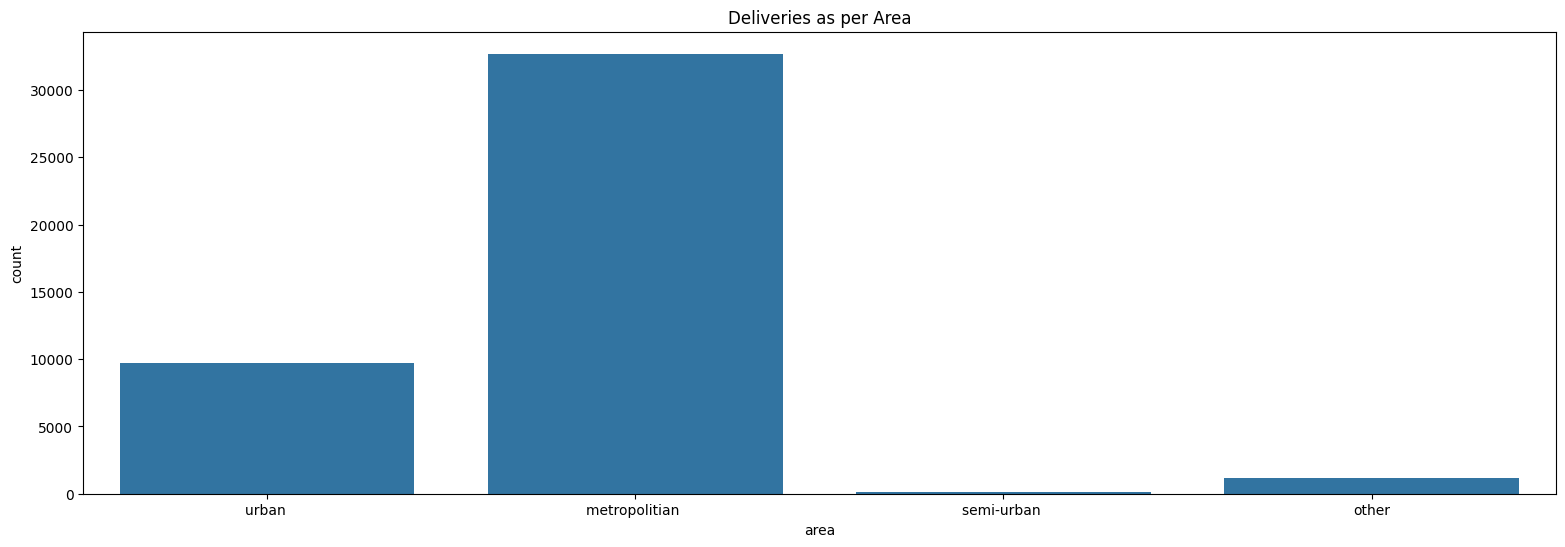

In [ ]:
df['vehicle'].value_counts()

plt.figure(figsize=(19,6))
sns.countplot(x='area',data=df)
plt.title('Deliveries as per Area')
plt.show()

# **Data Analysis**

**Descriptive Statistics**

In [ ]:
# Basic Descriptive Statistics
numerical_stats = df.describe().T
numerical_stats

count         mean         std          min          25%  \
agent_age        43739.0    29.567137    5.815155    15.000000    25.000000   
agent_rating     43739.0     4.633780    0.334510     1.000000     4.500000   
store_latitude   43739.0    17.210960    7.764225   -30.902872    12.933298   
store_longitude  43739.0    70.661177   21.475005   -88.366217    73.170283   
drop_latitude    43739.0    17.459031    7.342950     0.010000    12.985996   
drop_longitude   43739.0    70.821842   21.153148     0.010000    73.280000   
delivery_time    43739.0   124.905645   51.915451    10.000000    90.000000   
year             43739.0  2022.000000    0.000000  2022.000000  2022.000000   
month            43739.0     4.255470    2.927459     1.000000     3.000000   
day              43739.0    12.536684    9.586804     2.000000     3.000000   
weekday          43739.0     2.931846    1.972697     0.000000     1.000000   
order_hour       43648.0    17.425976    4.818494     0.000000    15.000000   
pickup_hour      43739.0    17.153159    5.320014     0.000000    14.000000   
distance_km      43739.0    38.464644  534.003187     1.463837     4.654125   

                         50%          75%           max  
agent_age          30.000000    35.000000     50.000000  
agent_rating        4.700000     4.900000      6.000000  
store_latitude     18.551440    22.732225     30.914057  
store_longitude    75.898497    78.045359     88.433452  
drop_latitude      18.633626    22.785049     31.054057  
drop_longitude     76.002574    78.104095     88.563452  
delivery_time     125.000000   160.000000    270.000000  
year             2022.000000  2022.000000   2022.000000  
month               3.000000     5.000000     12.000000  
day                13.000000    20.000000     31.000000  
weekday             3.000000     5.000000      6.000000  
order_hour         19.000000    21.000000     23.000000  
pickup_hour        19.000000    21.000000     23.000000  
distance_km         9.204136    13.661065  19709.575543

In [ ]:
# Range Calculation
numerical_stats['range'] = numerical_stats['max'] - numerical_stats['min']
numerical_stats

count         mean         std          min          25%  \
agent_age        43739.0    29.567137    5.815155    15.000000    25.000000   
agent_rating     43739.0     4.633780    0.334510     1.000000     4.500000   
store_latitude   43739.0    17.210960    7.764225   -30.902872    12.933298   
store_longitude  43739.0    70.661177   21.475005   -88.366217    73.170283   
drop_latitude    43739.0    17.459031    7.342950     0.010000    12.985996   
drop_longitude   43739.0    70.821842   21.153148     0.010000    73.280000   
delivery_time    43739.0   124.905645   51.915451    10.000000    90.000000   
year             43739.0  2022.000000    0.000000  2022.000000  2022.000000   
month            43739.0     4.255470    2.927459     1.000000     3.000000   
day              43739.0    12.536684    9.586804     2.000000     3.000000   
weekday          43739.0     2.931846    1.972697     0.000000     1.000000   
order_hour       43648.0    17.425976    4.818494     0.000000    15.000000   
pickup_hour      43739.0    17.153159    5.320014     0.000000    14.000000   
distance_km      43739.0    38.464644  534.003187     1.463837     4.654125   

                         50%          75%           max         range  
agent_age          30.000000    35.000000     50.000000     35.000000  
agent_rating        4.700000     4.900000      6.000000      5.000000  
store_latitude     18.551440    22.732225     30.914057     61.816929  
store_longitude    75.898497    78.045359     88.433452    176.799669  
drop_latitude      18.633626    22.785049     31.054057     31.044057  
drop_longitude     76.002574    78.104095     88.563452     88.553452  
delivery_time     125.000000   160.000000    270.000000    260.000000  
year             2022.000000  2022.000000   2022.000000      0.000000  
month               3.000000     5.000000     12.000000     11.000000  
day                13.000000    20.000000     31.000000     29.000000  
weekday             3.000000     5.000000      6.000000      6.000000  
order_hour         19.000000    21.000000     23.000000     23.000000  
pickup_hour        19.000000    21.000000     23.000000     23.000000  
distance_km         9.204136    13.661065  19709.575543  19708.111706

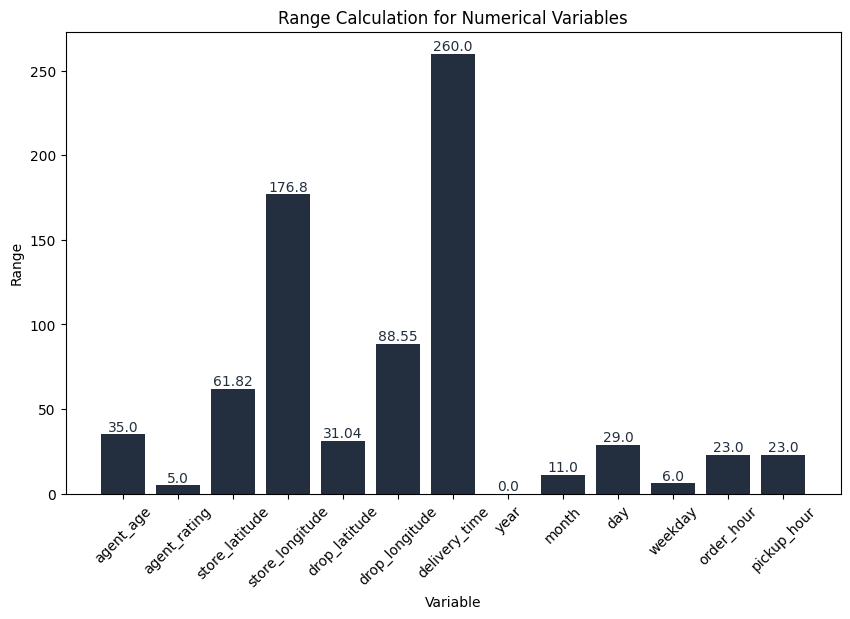

In [ ]:
# Exclude 'distance_km' from numerical_stats
numerical_stats_without_distance = numerical_stats.drop('distance_km')

# Plotting range for each numerical variable excluding 'distance_km'
plt.figure(figsize=(10, 6))
bars = plt.bar(numerical_stats_without_distance.index, numerical_stats_without_distance['range'], color='#232f3e')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom', color='#232f3e', fontsize=10)

plt.title('Range Calculation for Numerical Variables')
plt.xlabel('Variable')
plt.ylabel('Range')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Summary for Categorical Columns
categorical_summary = {col: df[col].value_counts() for col in df.select_dtypes(include=['object']).columns}
print("\nCategorical Summary:")
for col, summary in categorical_summary.items():
    print(f"\n{col.capitalize()}:\n", summary)


Categorical Summary:

Order_id:
 order_id
ialx566343618    1
qzgi619412151    1
weiw108744994    1
pfvr771559834    1
odmp530175660    1
                ..
yjwk928768239    1
mori995207669    1
bxnf323229063    1
knka353994987    1
nsyz997960170    1
Name: count, Length: 43739, dtype: int64

Weather:
 weather
fog           7531
stormy        7374
cloudy        7288
sandstorms    7245
windy         7223
sunny         7078
Name: count, dtype: int64

Traffic:
 traffic
low        14999
jam        13725
medium     10628
high        4296
nan           91
Name: count, dtype: int64

Vehicle:
 vehicle
air         25527
scooter     14639
van          3558
bicycle        15
Name: count, dtype: int64

Area:
 area
metropolitian     32698
urban              9751
other              1138
semi-urban          152
Name: count, dtype: int64

Category:
 category
electronics     2849
books           2824
jewelry         2802
toys            2781
skincare        2772
watches         2770
outdoors        274

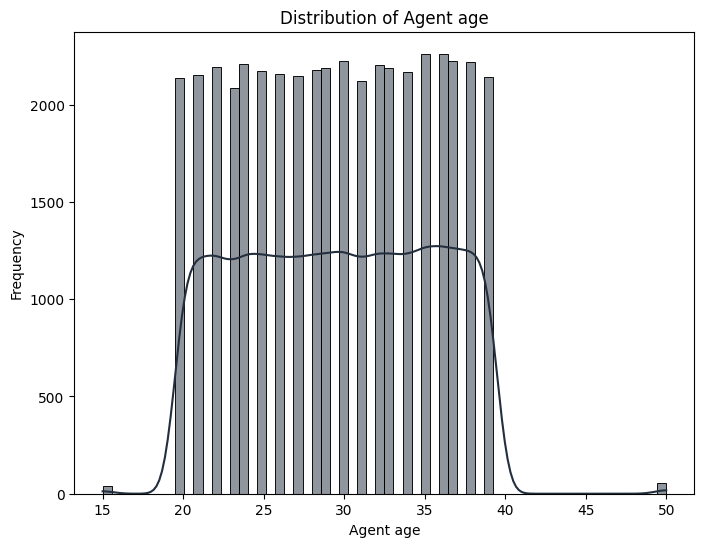

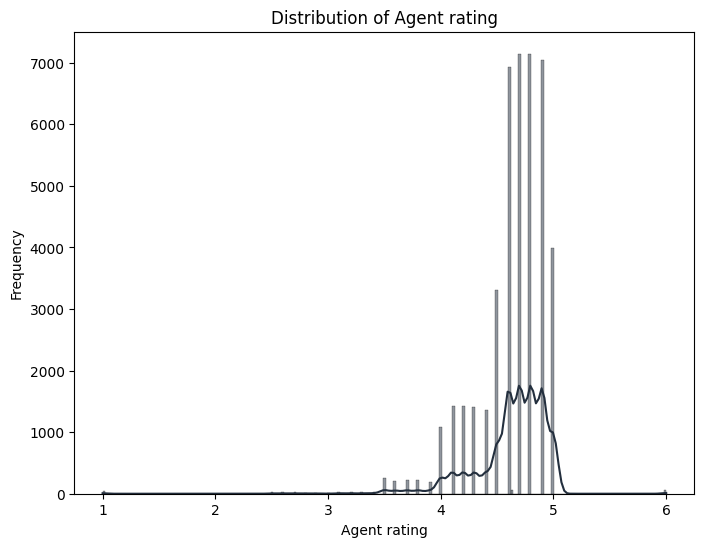

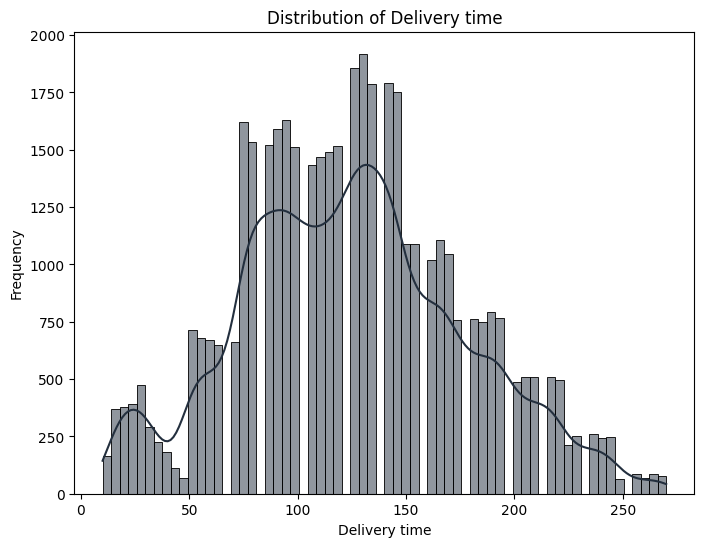

In [ ]:
numerical_columns = ['agent_age', 'agent_rating', 'delivery_time']
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, color='#232f3e')
    plt.title(f'Distribution of {col.replace("_", " ").capitalize()}')
    plt.xlabel(col.replace("_", " ").capitalize())
    plt.ylabel('Frequency')
    plt.show()

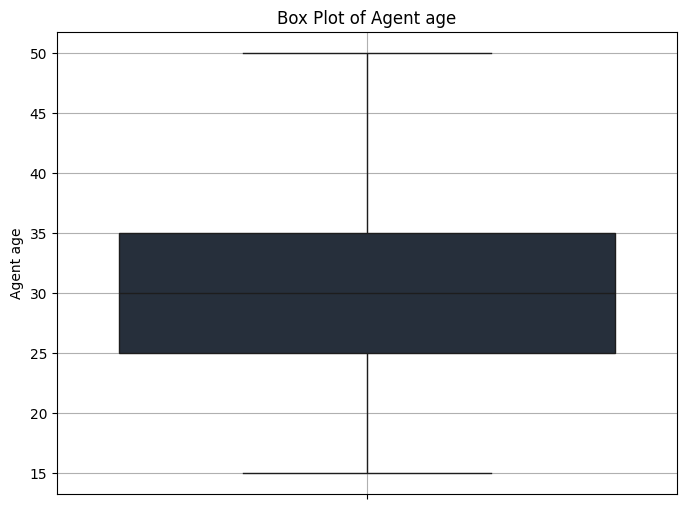

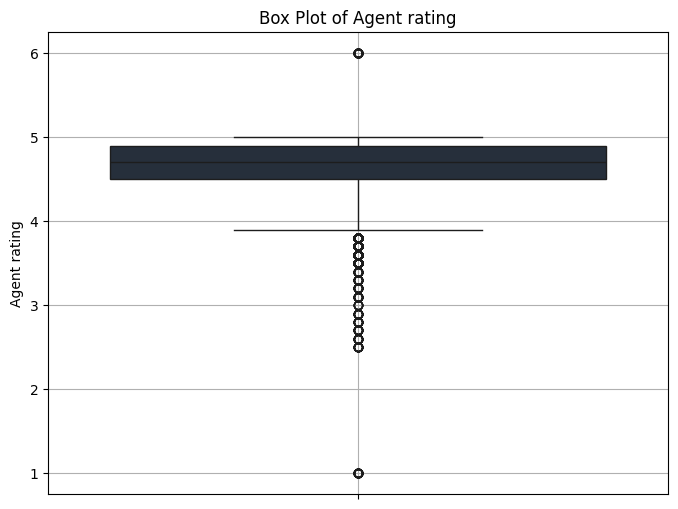

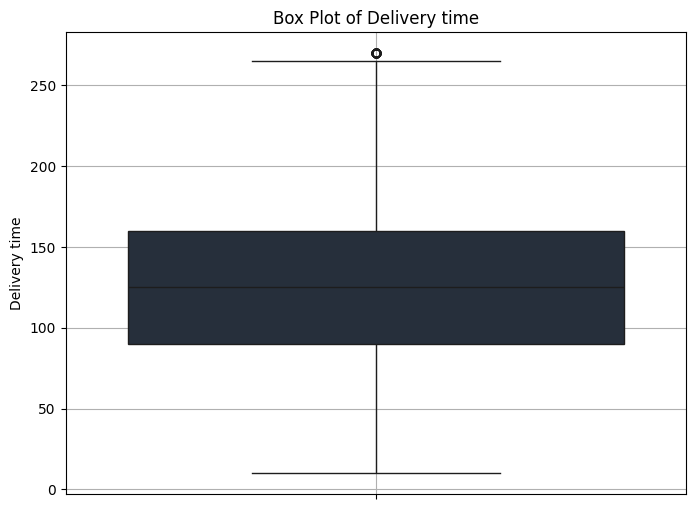

In [ ]:
# Box plots for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col], color='#232f3e')
    plt.title(f'Box Plot of {col.replace("_", " ").capitalize()}')
    plt.ylabel(col.replace("_", " ").capitalize())
    plt.grid(True)
    plt.show()

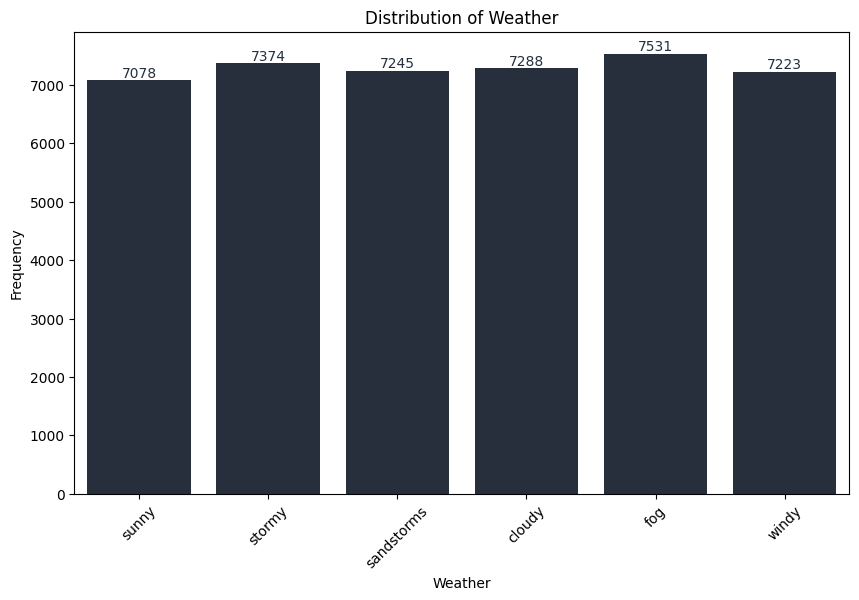

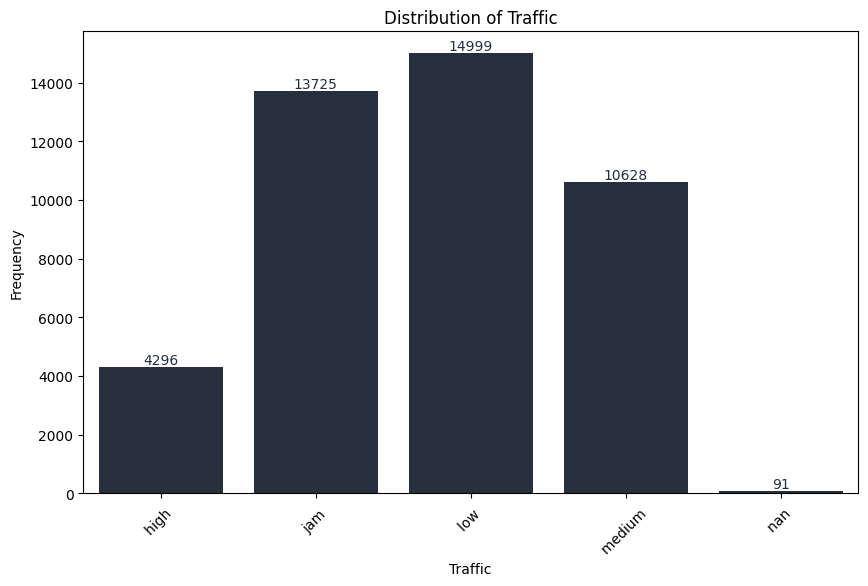

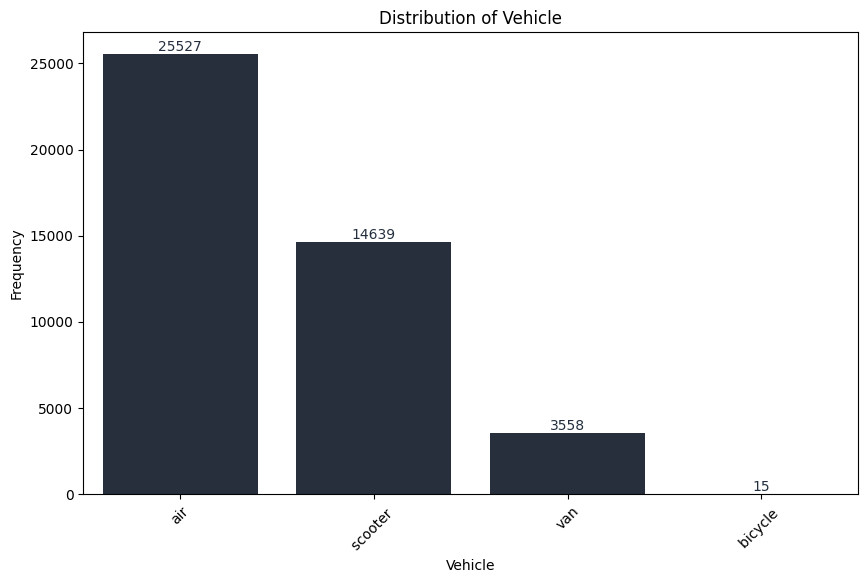

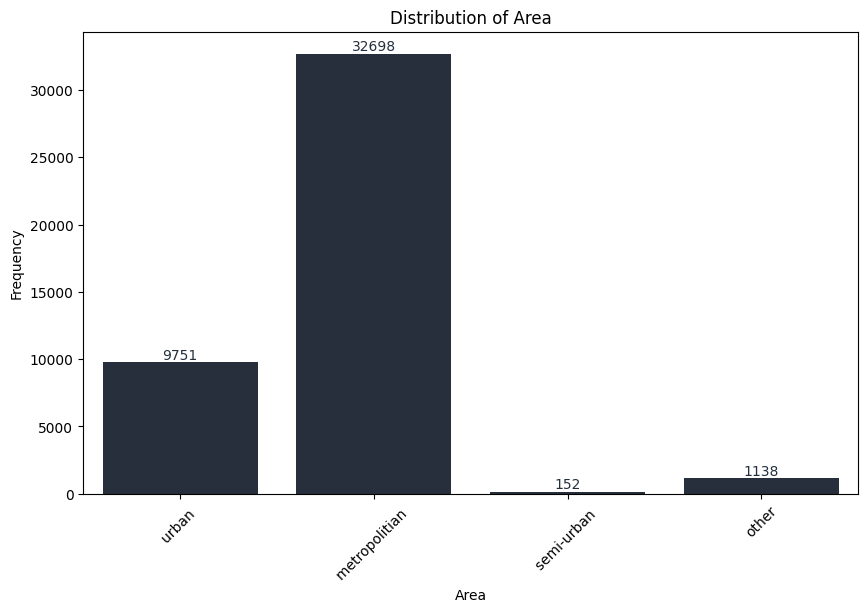

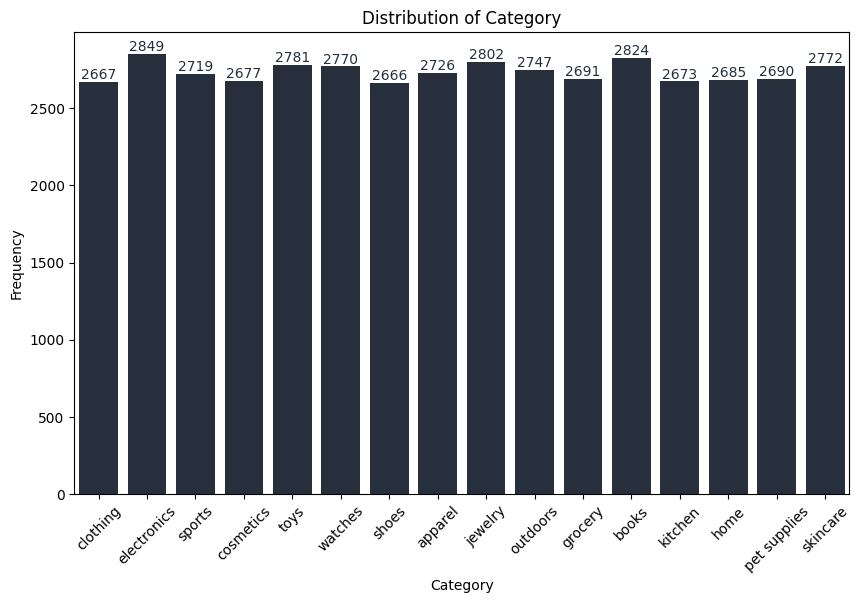

In [ ]:
# Bar plots for categorical columns
categorical_columns = ['weather', 'traffic', 'vehicle', 'area', 'category']
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df, palette=['#232f3e'])
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    for bar in plt.gca().patches:
        plt.gca().annotate(format(bar.get_height(), '.0f'),
                           (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                           ha='center', va='center', xytext=(0, 5),
                           textcoords='offset points', color='#232f3e')

    plt.show()

**Correlation Analysis**

In [ ]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_cols.corr()

# Display correlation matrix
correlation_matrix

agent_age  agent_rating  store_latitude  store_longitude  \
agent_age         1.000000     -0.067889       -0.004532        -0.009347   
agent_rating     -0.067889      1.000000       -0.007774        -0.014184   
store_latitude   -0.004532     -0.007774        1.000000         0.655086   
store_longitude  -0.009347     -0.014184        0.655086         1.000000   
drop_latitude     0.002489     -0.010306        0.926618         0.679743   
drop_longitude   -0.000495     -0.013533        0.643916         0.983280   
delivery_time     0.254618     -0.289854        0.017009         0.011173   
year                   NaN           NaN             NaN              NaN   
month            -0.003058     -0.009103       -0.002451        -0.003541   
day               0.003395     -0.003792       -0.001418         0.002030   
weekday           0.002449     -0.010920       -0.007471         0.001486   
order_hour       -0.000410     -0.061742        0.005907        -0.002014   
pickup_hour      -0.001203     -0.049387        0.007910         0.000197   
distance_km       0.041076     -0.001509       -0.270255        -0.128591   

                 drop_latitude  drop_longitude  delivery_time  year     month  \
agent_age             0.002489       -0.000495       0.254618   NaN -0.003058   
agent_rating         -0.010306       -0.013533      -0.289854   NaN -0.009103   
store_latitude        0.926618        0.643916       0.017009   NaN -0.002451   
store_longitude       0.679743        0.983280       0.011173   NaN -0.003541   
drop_latitude         1.000000        0.690943       0.016928   NaN -0.000171   
drop_longitude        0.690943        1.000000       0.011523   NaN -0.004495   
delivery_time         0.016928        0.011523       1.000000   NaN  0.025026   
year                       NaN             NaN            NaN   NaN       NaN   
month                -0.000171       -0.004495       0.025026   NaN  1.000000   
day                  -0.003161        0.002168       0.012438   NaN -0.489512   
weekday              -0.008254        0.002212       0.009513   NaN  0.141593   
order_hour            0.009333       -0.001015       0.158796   NaN  0.030805   
pickup_hour           0.011173        0.001185       0.173361   NaN  0.028598   
distance_km           0.032238        0.021149      -0.001854   NaN  0.000786   

                      day   weekday  order_hour  pickup_hour  distance_km  
agent_age        0.003395  0.002449   -0.000410    -0.001203     0.041076  
agent_rating    -0.003792 -0.010920   -0.061742    -0.049387    -0.001509  
store_latitude  -0.001418 -0.007471    0.005907     0.007910    -0.270255  
store_longitude  0.002030  0.001486   -0.002014     0.000197    -0.128591  
drop_latitude   -0.003161 -0.008254    0.009333     0.011173     0.032238  
drop_longitude   0.002168  0.002212   -0.001015     0.001185     0.021149  
delivery_time    0.012438  0.009513    0.158796     0.173361    -0.001854  
year                  NaN       NaN         NaN          NaN          NaN  
month           -0.489512  0.141593    0.030805     0.028598     0.000786  
day              1.000000 -0.038579    0.017994     0.017559    -0.002506  
weekday         -0.038579  1.000000    0.030868     0.025172     0.001683  
order_hour       0.017994  0.030868    1.000000     0.807443     0.011355  
pickup_hour      0.017559  0.025172    0.807443     1.000000     0.006150  
distance_km     -0.002506  0.001683    0.011355     0.006150     1.000000

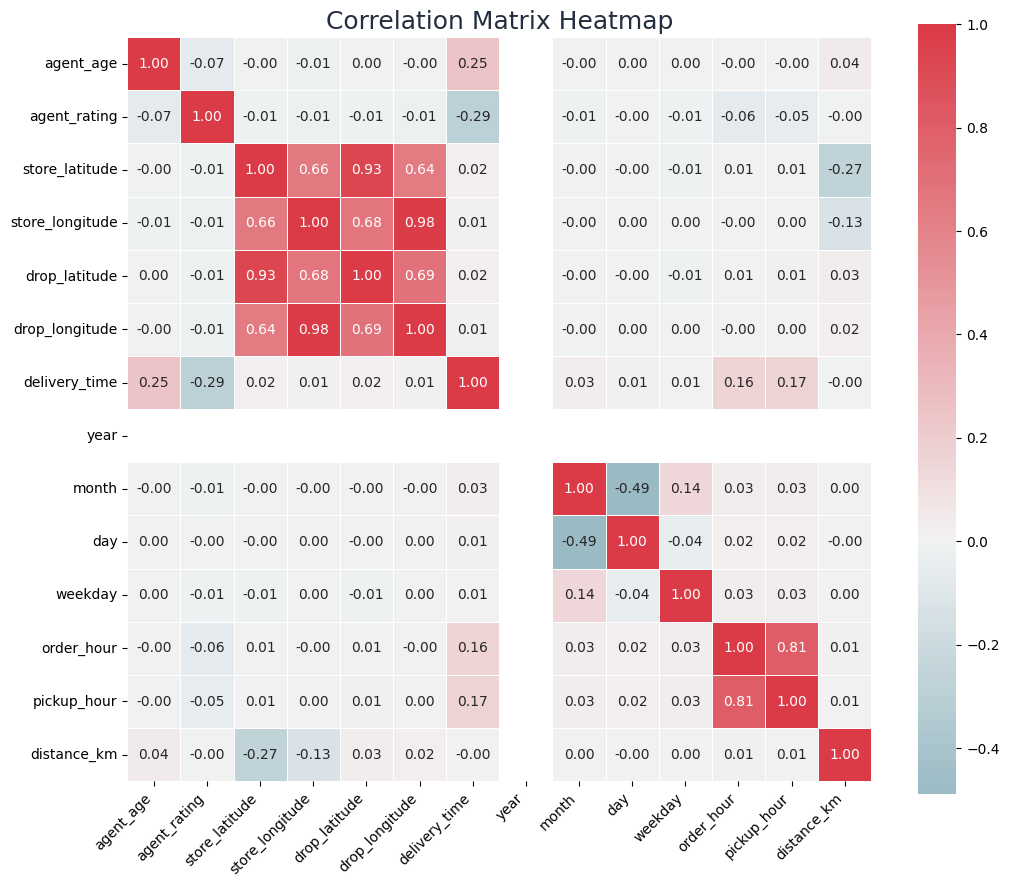

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, annot=True, fmt=".2f", annot_kws={"size": 10},color='#232f3e')

# Title and display options
plt.title('Correlation Matrix Heatmap', fontsize=18, color='#232f3e')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

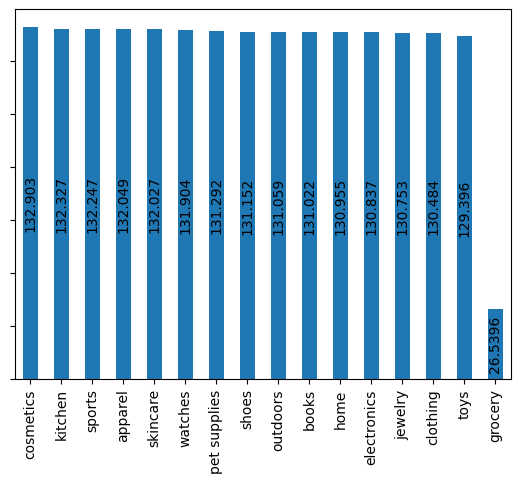

In [ ]:
fig, axes = plt.subplots()
grouped = df.groupby("category")
mean = grouped["delivery_time"].mean()
mean = mean.sort_values(ascending=False)
mean.plot(kind="bar", ax=axes)
for container in axes.containers:
    axes.bar_label(container, label_type="center", rotation=90)
axes.set_yticklabels(())
axes.set_ylabel("")
axes.set_xlabel("")
plt.show()

**Significant Correlations**

In [ ]:
# Extract highly correlated pairs
high_correlation_pairs = correlation_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False).drop_duplicates()
significant_correlations = high_correlation_pairs[high_correlation_pairs > 0.5]

significant_correlations

agent_age       agent_age          1.000000
drop_longitude  store_longitude    0.983280
store_latitude  drop_latitude      0.926618
pickup_hour     order_hour         0.807443
drop_latitude   drop_longitude     0.690943
                store_longitude    0.679743
store_latitude  store_longitude    0.655086
drop_longitude  store_latitude     0.643916
dtype: float64

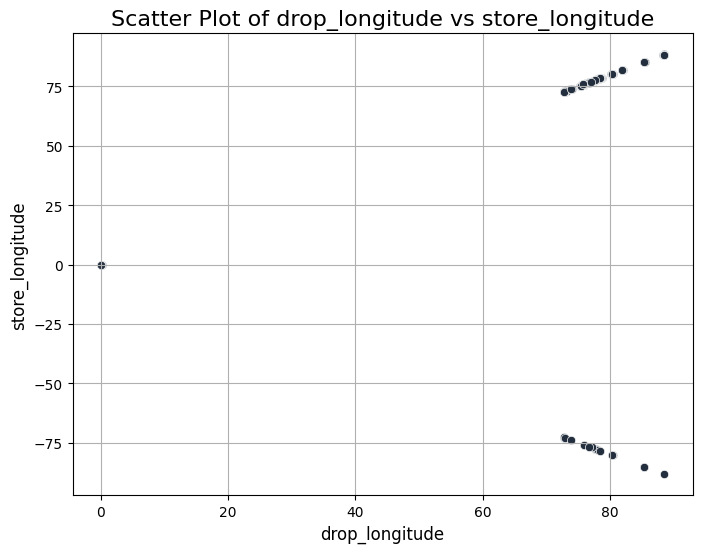

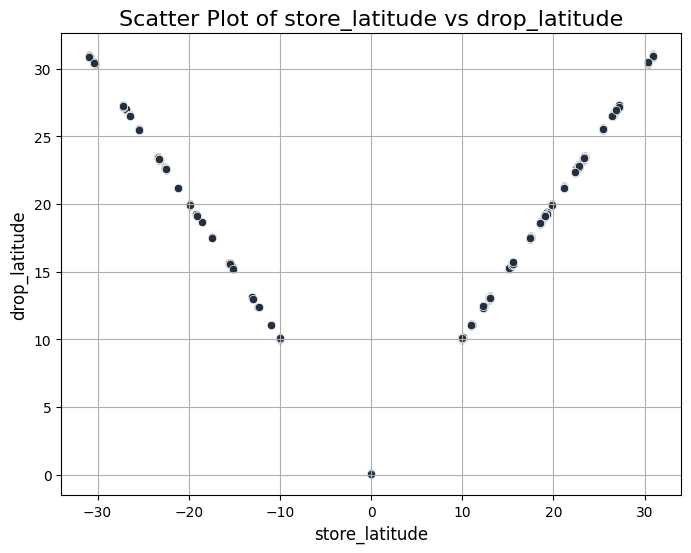

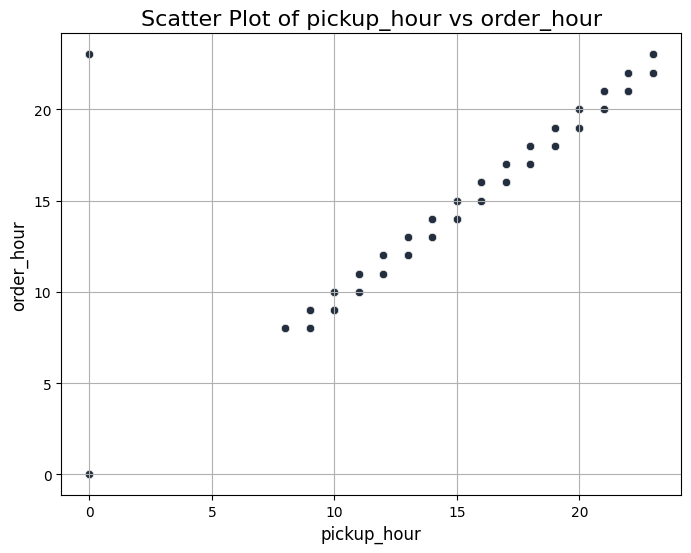

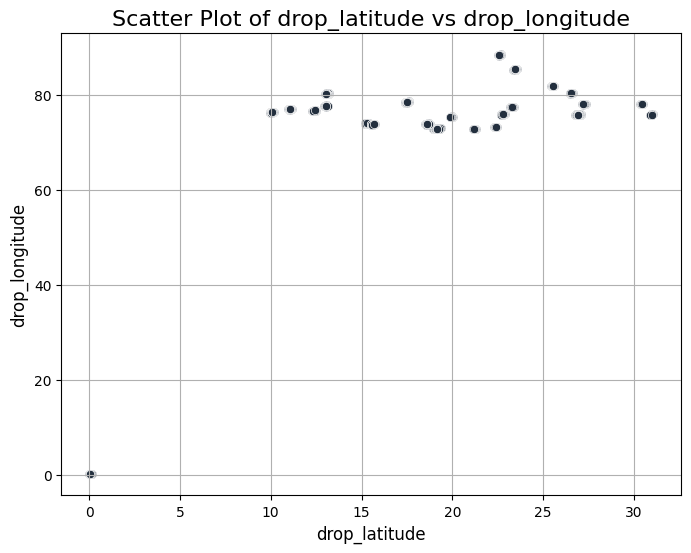

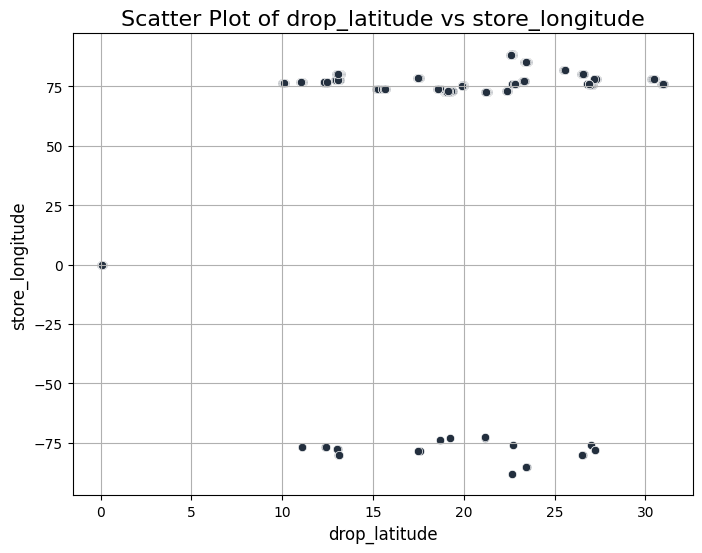

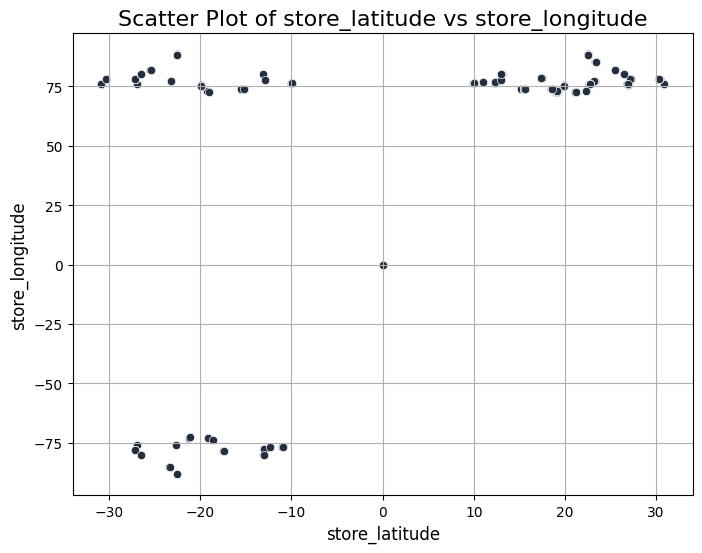

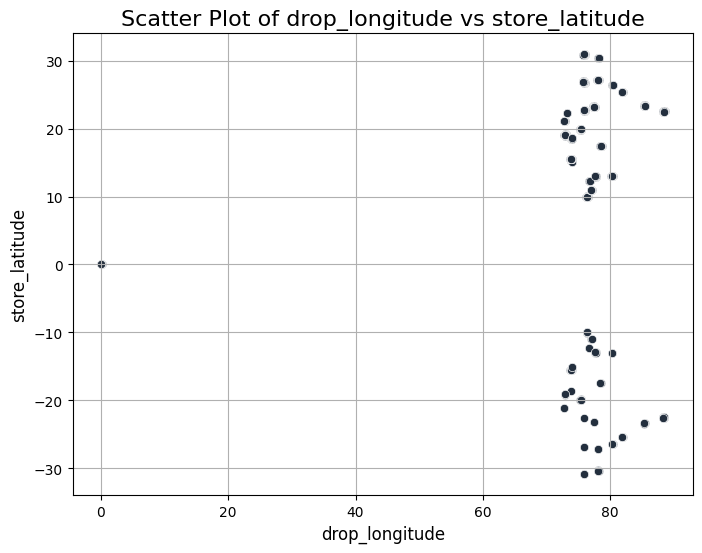

In [ ]:
# List of top significant correlations
top_significant_correlations = significant_correlations[1:11].index.tolist()  # Exclude the first pair as it will be (1, 1)

# Scatter plots for the top significant correlations
for (var1, var2) in top_significant_correlations:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=var1, y=var2, data=numeric_cols, color='#232f3e')
    plt.title(f'Scatter Plot of {var1} vs {var2}', fontsize=16)
    plt.xlabel(var1, fontsize=12)
    plt.ylabel(var2, fontsize=12)
    plt.grid(True)
    plt.show()

**Impact of Weather and Traffic**

In [ ]:
# Check the unique values in weather and traffic columns
print(df['weather'].unique())
print(df['traffic'].unique())

['sunny' 'stormy' 'sandstorms' 'cloudy' 'fog' 'windy']
['high ' 'jam ' 'low ' 'medium ' 'nan ']


In [ ]:
# Descriptive statistics for delivery times by weather
weather_stats = df.groupby('weather')['delivery_time'].describe()
print(weather_stats)

# Descriptive statistics for delivery times by traffic
traffic_stats = df.groupby('traffic')['delivery_time'].describe()
print(traffic_stats)

             count        mean        std   min   25%    50%    75%    max
weather                                                                   
cloudy      7288.0  138.286773  55.466779  10.0  95.0  140.0  180.0  270.0
fog         7531.0  136.378701  57.101310  10.0  90.0  135.0  180.0  270.0
sandstorms  7245.0  123.238509  48.312012  10.0  90.0  125.0  150.0  270.0
stormy      7374.0  123.211825  47.801804  10.0  90.0  125.0  150.0  270.0
sunny       7078.0  103.664453  45.437248  10.0  75.0  100.0  125.0  270.0
windy       7223.0  123.658037  48.522905  10.0  90.0  125.0  150.0  270.0
           count        mean        std   min    25%    50%    75%    max
traffic                                                                  
high      4296.0  129.424115  48.273993  10.0  100.0  135.0  160.0  270.0
jam      13725.0  147.758980  56.813774  10.0  110.0  150.0  190.0  270.0
low      14999.0  101.354557  38.802730  10.0   75.0  100.0  125.0  220.0
medium   10628.0  126.839669  

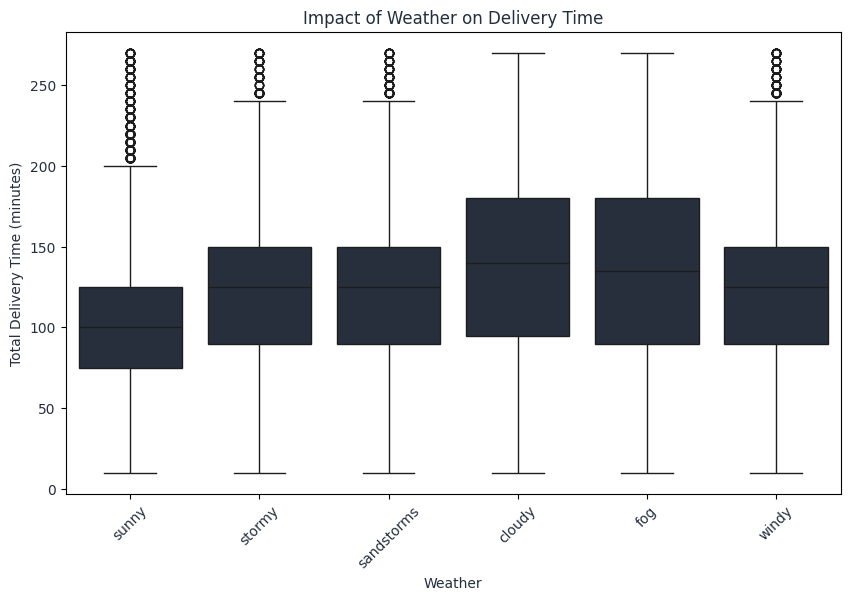

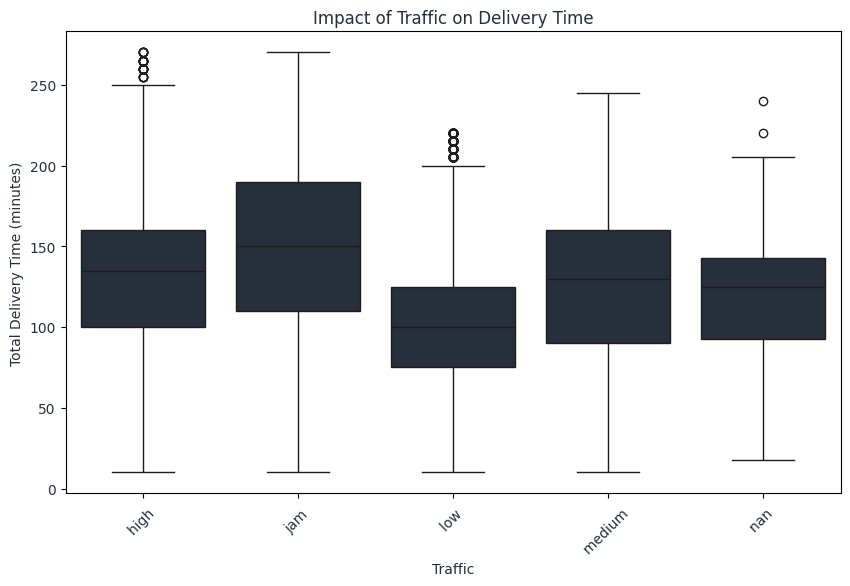

In [ ]:
# Box plot for delivery time by weather
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather', y='delivery_time', data=df, color='#232f3e')
plt.title('Impact of Weather on Delivery Time', color='#232f3e')
plt.xlabel('Weather', color='#232f3e')
plt.ylabel('Total Delivery Time (minutes)', color='#232f3e')
plt.xticks(rotation=45, color='#232f3e')
plt.yticks(color='#232f3e')
plt.show()

# Box plot for delivery time by traffic
plt.figure(figsize=(10, 6))
sns.boxplot(x='traffic', y='delivery_time', data=df, color='#232f3e')
plt.title('Impact of Traffic on Delivery Time', color='#232f3e')
plt.xlabel('Traffic', color='#232f3e')
plt.ylabel('Total Delivery Time (minutes)', color='#232f3e')
plt.xticks(rotation=45, color='#232f3e')
plt.yticks(color='#232f3e')
plt.show()

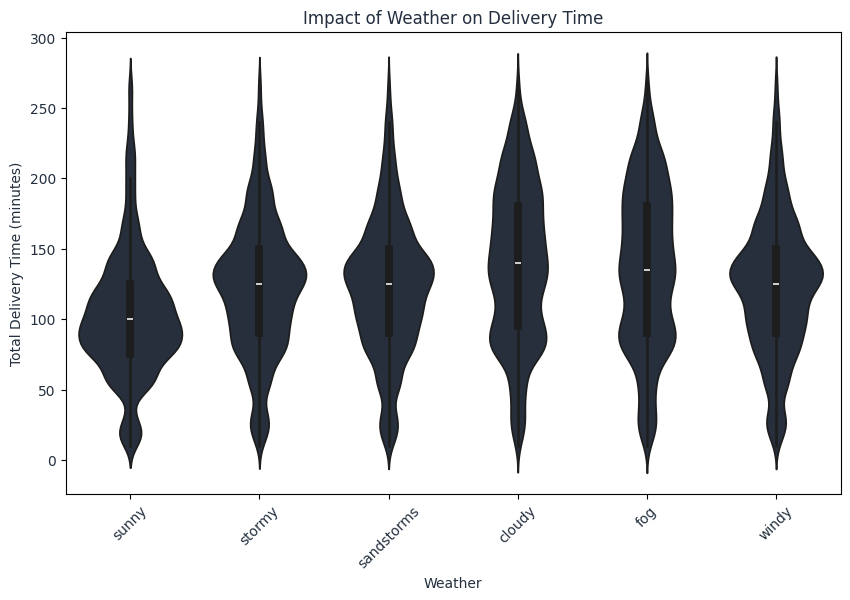

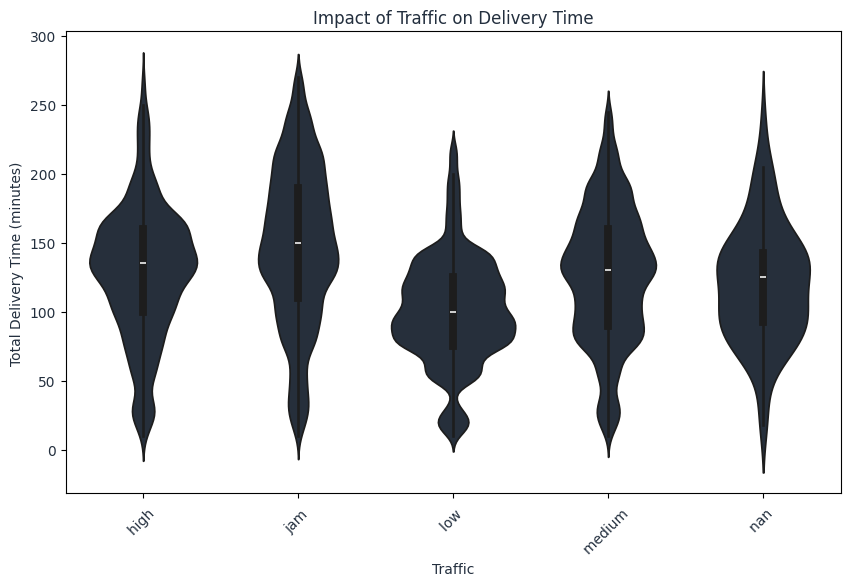

In [ ]:
# Violin plot for delivery time by weather
plt.figure(figsize=(10, 6))
sns.violinplot(x='weather', y='delivery_time', data=df, color='#232f3e')
plt.title('Impact of Weather on Delivery Time', color='#232f3e')
plt.xlabel('Weather', color='#232f3e')
plt.ylabel('Total Delivery Time (minutes)', color='#232f3e')
plt.xticks(rotation=45, color='#232f3e')
plt.yticks(color='#232f3e')
plt.show()

# Violin plot for delivery time by traffic
plt.figure(figsize=(10, 6))
sns.violinplot(x='traffic', y='delivery_time', data=df, color='#232f3e')
plt.title('Impact of Traffic on Delivery Time', color='#232f3e')
plt.xlabel('Traffic', color='#232f3e')
plt.ylabel('Total Delivery Time (minutes)', color='#232f3e')
plt.xticks(rotation=45, color='#232f3e')
plt.yticks(color='#232f3e')
plt.show()

In [ ]:
import scipy.stats as stats

# ANOVA for weather impact
weather_groups = [group['delivery_time'].values for name, group in df.groupby('weather')]
weather_anova = stats.f_oneway(*weather_groups)
print(f'ANOVA result for weather impact: F-statistic={weather_anova.statistic}, p-value={weather_anova.pvalue}')

# ANOVA for traffic impact
traffic_groups = [group['delivery_time'].values for name, group in df.groupby('traffic')]
traffic_anova = stats.f_oneway(*traffic_groups)
print(f'ANOVA result for traffic impact: F-statistic={traffic_anova.statistic}, p-value={traffic_anova.pvalue}')

ANOVA result for weather impact: F-statistic=431.5109484919322, p-value=0.0
ANOVA result for traffic impact: F-statistic=1669.5929890606258, p-value=0.0


**Latitude and Longitude Analysis**

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
from geopy.distance import geodesic
import folium

**Using Folium for Interactive Map**

In [ ]:
# Create a base map
map_center = [df['store_latitude'].mean(), df['store_longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=5)

# Add store locations
for idx, row in df.iterrows():
    folium.Marker([row['store_latitude'], row['store_longitude']],
                  popup=f"Store Location {idx+1}",
                  icon=folium.Icon(color='blue')).add_to(m)

# Add drop locations
for idx, row in df.iterrows():
    folium.Marker([row['drop_latitude'], row['drop_longitude']],
                  popup=f"Drop Location {idx+1}",
                  icon=folium.Icon(color='green')).add_to(m)

# Save the map as an HTML file
# m.save('map.html')
# m

In [ ]:
from folium.plugins import HeatMap

# Combine store and drop locations for heatmap
locations = df[['store_latitude', 'store_longitude']].values.tolist() + df[['drop_latitude', 'drop_longitude']].values.tolist()

# Create a base map
m_heat = folium.Map(location=map_center, zoom_start=5)

# Add heatmap
HeatMap(locations).add_to(m_heat)

# Save the heatmap as an HTML file
m_heat.save('heatmap.html')
m_heat

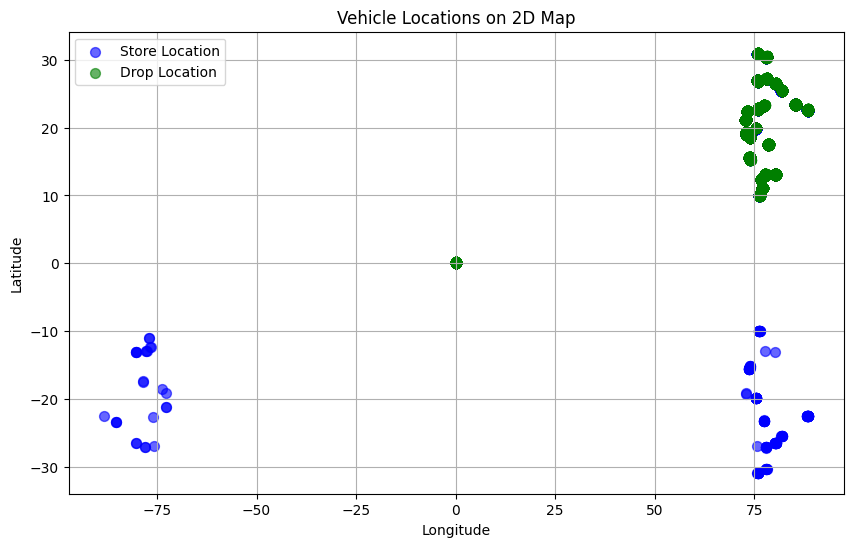

In [ ]:
# Plotting the vehicle locations using matplotlib
plt.figure(figsize=(10, 6))

# Scatter plot for store locations (latitude vs. longitude)
plt.scatter(df['store_longitude'], df['store_latitude'], color='blue', label='Store Location', alpha=0.6, s=50)

# Scatter plot for drop locations (latitude vs. longitude)
plt.scatter(df['drop_longitude'], df['drop_latitude'], color='green', label='Drop Location', alpha=0.6, s=50)

# Setting labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Vehicle Locations on 2D Map')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

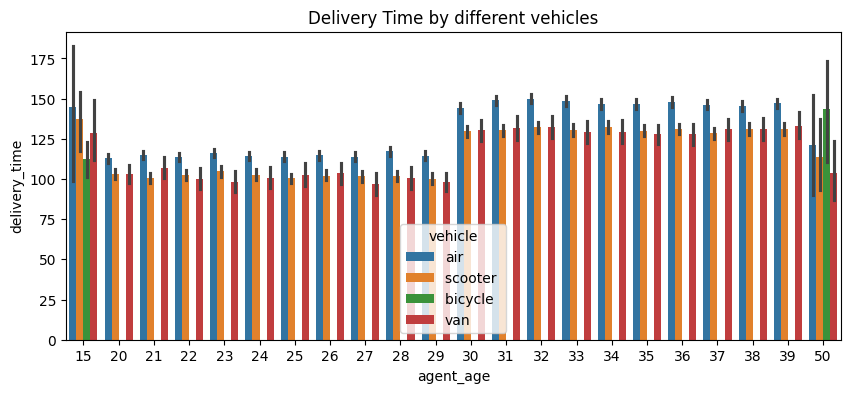

In [ ]:
import seaborn as sb
import pandas as pd # Assuming you have a DataFrame named 'df' with the necessary columns

# Assuming 'df' contains the required data, rename it to 'vehicle'
vehicle = df

plt.figure(figsize = (10, 4))
# Check for typos and use the correct column name for the x-axis.
# If the column does not exist, you will need to create it first.
sb.barplot(data = vehicle, x = 'agent_age', y = 'delivery_time', hue = 'vehicle')

plt.title("Delivery Time by different vehicles")
plt.show()

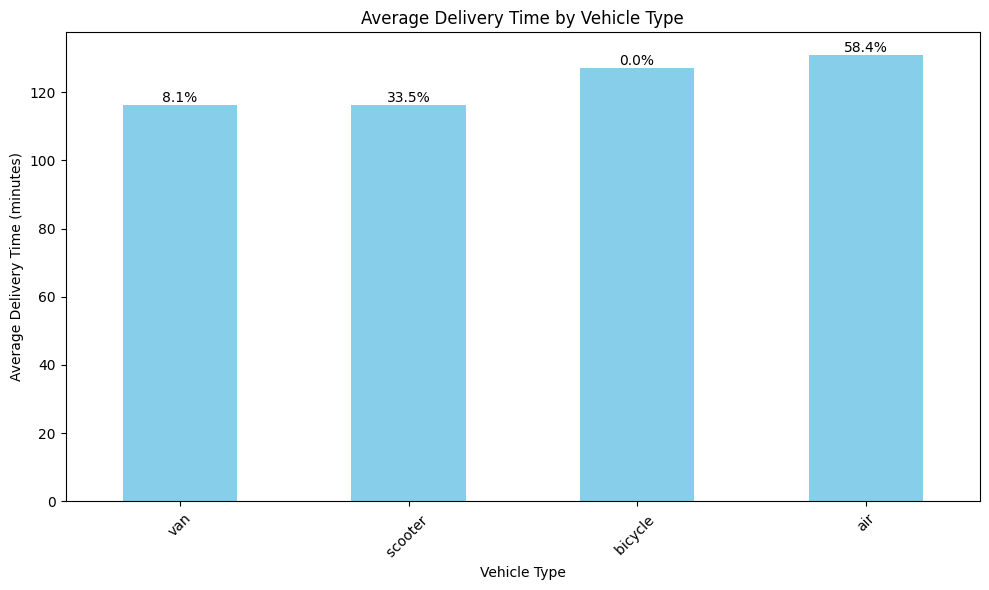

          average_delivery_time  delivery_percentage
vehicle                                             
van                  116.137156             8.134617
scooter              116.361637            33.468986
bicycle              127.000000             0.034294
air                  131.026325            58.362102


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Convert delivery_time column to numeric (assuming it is in minutes)
df['delivery_time'] = pd.to_numeric(df['delivery_time'], errors='coerce')

# Calculate average delivery time for each vehicle type
average_delivery_time = df.groupby('vehicle')['delivery_time'].mean()

# Calculate the percentage of total deliveries made by each vehicle type
vehicle_counts = df['vehicle'].value_counts(normalize=True) * 100

# Combine the results into a DataFrame for easier visualization
vehicle_performance = pd.DataFrame({
    'average_delivery_time': average_delivery_time,
    'delivery_percentage': vehicle_counts
}).sort_values(by='average_delivery_time')

# Plot the average delivery time for each vehicle type
plt.figure(figsize=(10, 6))
ax = vehicle_performance['average_delivery_time'].plot(kind='bar', color='skyblue')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Delivery Time (minutes)')
plt.title('Average Delivery Time by Vehicle Type')
plt.xticks(rotation=45)

# Annotate the bars with the percentage of deliveries
for i, (percent, time) in enumerate(zip(vehicle_performance['delivery_percentage'], vehicle_performance['average_delivery_time'])):
    ax.text(i, time, f'{percent:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Display the results as text
print(vehicle_performance)


# **Random Forest classifier**

**Feature Engineering - Calculate Distance**

In [ ]:
# Haversine function to calculate distance
def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0
    # Convert coordinates from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Difference in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula
    a = np.sin(dlat / 2.0) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

# Apply the function to calculate distance between store and drop locations
df['distance'] = df.apply(lambda row: haversine(row['store_latitude'], row['store_longitude'], row['drop_latitude'], row['drop_longitude']), axis=1)

**Define Delivery Accuracy**

In [ ]:
# Calculate the delivery accuracy as the absolute difference between estimated and actual delivery times
df['delivery_accuracy'] = df['delivery_time']  # Assuming delivery_time is the actual time taken

# For example, if you have an estimated time (let's say it's a fixed target of 30 minutes for simplicity):
df['target_time'] = 30
df['accuracy'] = abs(df['delivery_time'] - df['target_time'])

# Determine on-time delivery (binary classification)
df['on_time'] = df['delivery_time'] <= df['target_time']

**Model Training and Prediction**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer # Import the imputer

# Select features and target variable
features = ['distance', 'order_hour', 'pickup_hour', 'weekday']
target = 'vehicle'

# Split the data into training and test sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Replace missing values with the mean
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Model Accuracy: 0.47
Classification Report:
               precision    recall  f1-score   support

         air       0.59      0.61      0.60      7675
    bicycle        0.00      0.00      0.00         5
    scooter        0.34      0.33      0.33      4372
         van       0.08      0.07      0.07      1070

    accuracy                           0.47     13122
   macro avg       0.25      0.25      0.25     13122
weighted avg       0.46      0.47      0.47     13122



# **Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
# Define the feature columns and target column
feature_columns = [
    'agent_age', 'agent_rating', 'store_latitude', 'store_longitude',
    'drop_latitude', 'drop_longitude', 'weather', 'traffic',
    'vehicle', 'area', 'year', 'month', 'day', 'weekday', 'order_hour', 'pickup_hour'
]
target_column = 'delivery_time'

# Prepare the feature matrix (X) and target vector (y)
X = df[feature_columns]
y = df[target_column]

In [ ]:
# One-hot encoding categorical features
X = pd.get_dummies(X, columns=['weather', 'traffic', 'vehicle', 'area'], drop_first=True)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Impute missing values using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # You can choose a different strategy if needed
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data (using imputed data)
model.fit(X_train_imputed, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test data (using imputed data)
y_pred = model.predict(X_test_imputed)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared
r_squared = model.score(X_test_imputed, y_test)
print(f"R-squared: {r_squared}")

Mean Squared Error (MSE): 1759.0289071921343
Root Mean Squared Error (RMSE): 41.94077857160182
R-squared: 0.3396884749813509


# **SVM Model**

In [ ]:
# Make predictions on the test set (using imputed data)
y_pred = model.predict(X_test_imputed)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print the evaluation results
print(f"Linear Regression - RMSE: {rmse:.2f}")
print(f"Linear Regression - MAE: {mae:.2f}")
print(f"Linear Regression - MAPE: {mape:.2f}%")

Linear Regression - RMSE: 41.94
Linear Regression - MAE: 31.31
Linear Regression - MAPE: 0.47%


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
# Define the feature columns and target column
feature_columns = [
    'agent_age', 'agent_rating', 'store_latitude', 'store_longitude',
    'drop_latitude', 'drop_longitude', 'weather', 'traffic',
    'vehicle', 'area', 'year', 'month', 'day', 'weekday', 'order_hour', 'pickup_hour'
]
target_column = 'delivery_time'

# Prepare the feature matrix (X) and target vector (y)
X = df[feature_columns]
y = df[target_column]

In [ ]:
# One-hot encoding categorical features
X = pd.get_dummies(X, columns=['weather', 'traffic', 'vehicle', 'area'], drop_first=True)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Impute missing values using SimpleImputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean of the column
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)  # Use the same imputer fitted on training data

# Initialize the Support Vector Regression model
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Fit the model to the imputed training data
svm_model.fit(X_train_imputed, y_train)  # Use the imputed training data

SVR()

In [ ]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test_imputed)  # Use the imputed test data

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print the evaluation results
print(f"SVM - RMSE: {rmse:.2f}")
print(f"SVM - MAE: {mae:.2f}")
print(f"SVM - MAPE: {mape:.2f}%")

SVM - RMSE: 51.56
SVM - MAE: 41.17
SVM - MAPE: 0.58%


# A* Algorithm

In [ ]:
# Impute missing values using SimpleImputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean of the column
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test) # Use the same imputer fitted on training data

# Initialize and train the model
from sklearn.ensemble import RandomForestRegressor # import the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_imputed, y_train) # Use the imputed data for training

# Make predictions - use imputed data
y_pred = model.predict(X_test_imputed)

# Calculate metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # import the r2_score function

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Calculate accuracy (as a percentage of predictions within a certain threshold)
threshold = 10  # For example, predictions within 10 minutes of actual time
accuracy = np.mean(np.abs(y_test - y_pred) <= threshold) * 100

print(f"Accuracy (within {threshold} minutes): {accuracy:.2f}%")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

Mean Absolute Error: 26.89
Root Mean Squared Error: 37.90
R-squared Score: 0.46
Accuracy (within 10 minutes): 27.95%

Top 10 Most Important Features:
            feature  importance
1      agent_rating    0.190722
0         agent_age    0.118904
18     traffic_low     0.092060
5    drop_longitude    0.068007
4     drop_latitude    0.066339
3   store_longitude    0.053887
2    store_latitude    0.051796
15    weather_sunny    0.051323
8               day    0.046185
9           weekday    0.039243
